Notes: 

A slightly cleaner version of my code used for sliced. In the end, I went for a hail mary and grabbed all numeric features with a random forest. 

I didn't realize that the documentation was in the KEYS file, and realized pretty late in the game that dec and dec_o were features that are used to make up the target. 


In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


In [19]:
SEED=1234

In [20]:
from google.colab import files
uploaded = files.upload()

In [21]:
df = pd.read_csv("sliced-s00e01-data.csv")
holdout = pd.read_csv("sliced-s00e01-holdout.csv")

In [22]:
df = df.iloc[:,1:].drop(['dec', 'dec_o'] , axis=1)

In [23]:
df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s',
       'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s'],
      dtype='object', length=117)

In [24]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,income,goal,date,...,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s
count,5934.000000,5933.000000,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,4088.000000,5934.000000,5934.000000,5924.000000,5934.000000,5786.000000,5934.000000,5835.000000,5866.000000,5850.000000,5850.000000,5850.000000,5841.000000,5832.000000,5810.000000,5733.000000,5692.000000,5680.000000,5645.000000,5403.000000,5165.000000,5716.000000,5658.000000,5601.000000,5844.000000,5857.000000,5876.000000,5860.000000,5860.000000,5934.000000,5860.000000,5842.000000,...,4050.000000,4050.000000,4028.000000,5860.000000,5860.000000,5860.000000,5860.000000,5850.000000,5850.000000,5834.000000,5834.000000,5834.000000,5834.000000,5834.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,5743.000000,5702.000000,5690.000000,5655.000000,5413.000000,5174.000000,5726.000000,5667.000000,5611.00000,5396.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000
mean,310.301146,8.647564,0.500843,16.680317,1.800472,12.253455,16.243680,8.772497,9.054795,8.610044,8.652342,310.611411,0.167846,0.188199,0.396023,26.314824,2.797818,24.236304,17.003726,20.477511,17.446153,9.767003,11.280238,6.188191,7.202038,7.355898,6.438618,6.783916,5.452178,6.147516,5.195299,1.966613,26.306297,7.405839,2.798502,3.703242,3.634983,22008.947253,2.153925,4.980828,...,17.884938,10.855062,12.227905,33.559556,12.409727,13.822867,18.427474,10.705128,11.123248,7.015770,8.255742,7.722660,8.309050,7.501543,6.997018,7.968688,8.242296,7.561382,7.580765,6.187602,7.201859,7.354921,6.438550,6.782653,5.451778,6.146909,5.194283,0.98699,3.173703,21.979318,13.536054,14.736165,13.302963,8.517887,10.184740,7.180383,8.193912,8.112176,7.831454,7.573281
std,179.369934,5.366947,0.500041,10.652665,0.399679,6.850438,4.441686,5.403254,5.591592,5.339567,5.366868,179.362053,0.373761,0.303656,0.489111,3.671660,1.245638,13.840748,7.651829,7.315642,6.798981,6.223187,6.766565,1.975234,1.772570,1.579763,1.981599,1.834381,2.204174,1.852291,2.169407,0.205616,3.675660,3.890148,1.245890,2.809444,2.810394,25253.351357,1.431914,1.476742,...,6.943273,7.864685,6.386617,17.294041,7.535967,6.669177,7.200161,6.959109,6.505152,1.393487,1.406460,1.582156,1.076038,1.772046,1.481342,1.629035,1.325364,1.777650,1.801603,1.974998,1.772154,1.579637,1.981025,1.834276,2.204363,1.852314,2.169633,0.98817,2.326041,17.689375,8.143942,7.523322,6.421257,4.944571,6.311861,1.296831,1.382612,1.184402,1.547263,1.747768
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-0.730000,0.000000,18.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,4.000000,3.000000,2.000000
25%,102.000000,4.000000,0.000000,8.000000,2.000000,4.000000,14.000000,4.000000,4.000000,4.000000,4.000000,102.000000,0.000000,-0.030000,0.000000,23.000000,2.000000,15.000000,10.000000,17.000000,13.000000,5.000000,5.000000,5.000000,6.00

In [25]:
target = 'match'

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target])

In [27]:
y_train.shape

(4450,)

In [28]:
X_train.shape

(4450, 116)

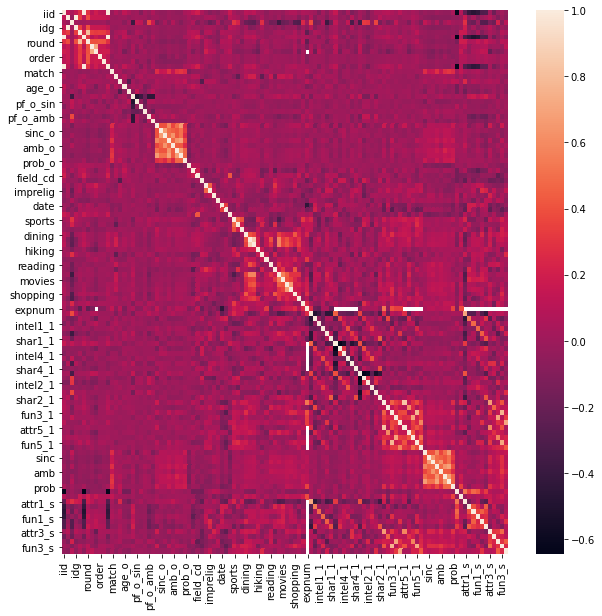

In [29]:
fig, ax = plt.subplots(figsize=[10,10])
sns.heatmap(df.corr())

In [30]:
corr_plot = df.corr().loc[:,'match'].sort_values().reset_index()

In [31]:
corr_plot.head()

,index,match
0,met_o,-0.116154
1,date,-0.075730
2,go_out,-0.071750
3,sinc4_1,-0.069700
4,pf_o_sha,-0.053708


In [32]:
px.bar(data_frame=corr_plot, x='index', y='match')

In [33]:
feats = corr_plot.query('abs(match) > .1 and index != "match"')['index'].tolist()

In [34]:
df[feats]

,met_o,amb_o,amb,match_es,expnum,sinc,sinc_o,intel_o,intel,prob,prob_o,attr,attr_o,shar,shar_o,fun,fun_o,like,like_o
0,2.0,8.0,6.0,4.0,2.0,9.0,8.0,8.0,7.0,6.0,4.0,6.0,6.0,5.0,6.0,7.0,8.0,7.0,7.0
1,2.0,7.0,5.0,4.0,2.0,8.0,8.0,10.0,7.0,5.0,4.0,7.0,7.0,6.0,5.0,8.0,7.0,7.0,8.0
2,1.0,10.0,5.0,4.0,2.0,8.0,10.0,10.0,9.0,NaN,10.0,5.0,10.0,7.0,10.0,8.0,10.0,7.0,10.0
3,2.0,9.0,6.0,4.0,2.0,6.0,8.0,9.0,8.0,6.0,7.0,7.0,7.0,8.0,8.0,7.0,8.0,7.0,7.0
4,2.0,9.0,6.0,4.0,2.0,6.0,7.0,9.0,7.0,6.0,6.0,5.0,8.0,6.0,7.0,7.0,6.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5929,NaN,6.0,NaN,3.0,NaN,5.0,5.0,3.0,5.0,5.0,1.0,3.0,10.0,NaN,5.0,5.0,2.0,2.0,6.0
5930,2.0,7.0,4.0,3.0,NaN,6.0,3.0,7.0,8.0,4.0,2.0,4.0,6.0,NaN,2.0,4.0,3.0,4.0,2.0
5931,2.0,2.0,8.0,3.0,NaN,7.0,1.0,2.0,8.0,5.0,1.0,4.0,2.0,NaN,1.0,8.0,2.0,6.0,2.0
5932,2.0,3.0,NaN,3.0,NaN,6.0,7.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,6.0,4.0,5.0,5.0,6.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



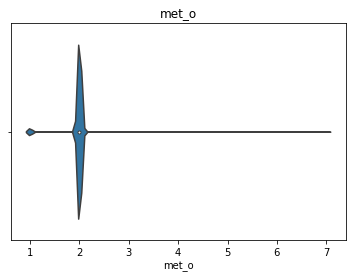

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



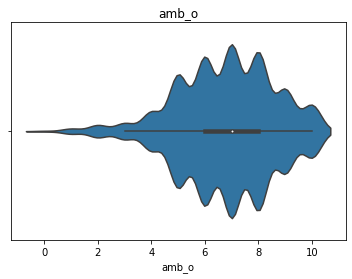

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



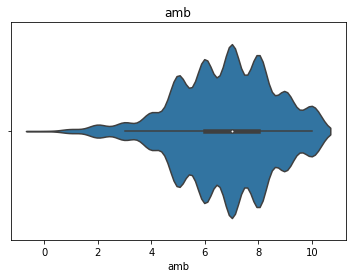

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



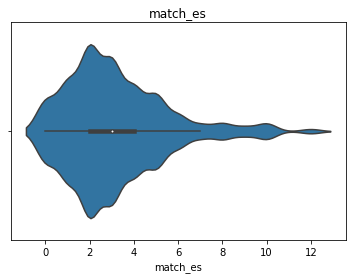

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



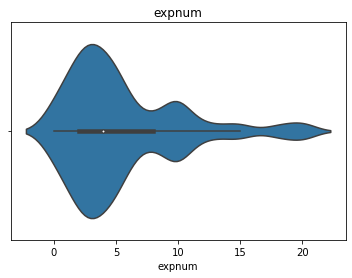

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



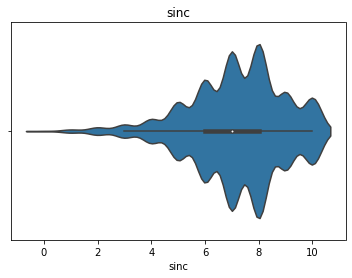

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



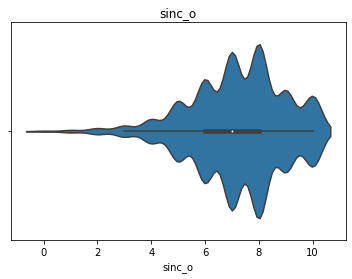

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



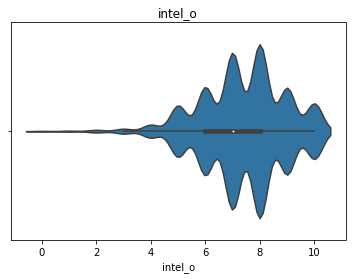

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



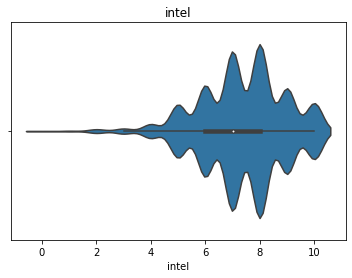

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



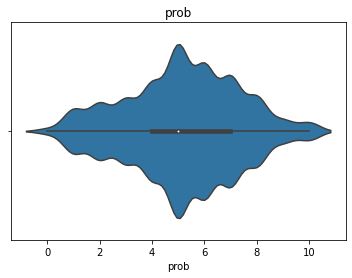

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



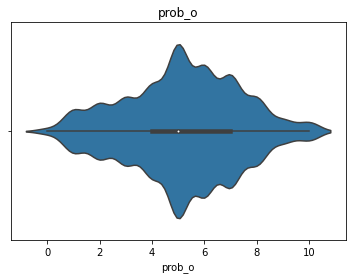

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



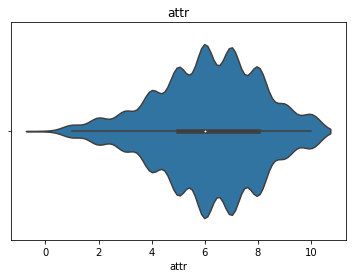

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



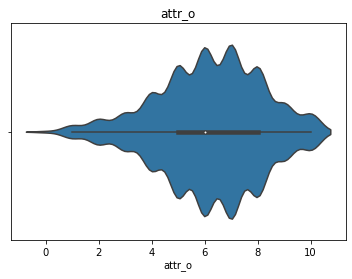

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



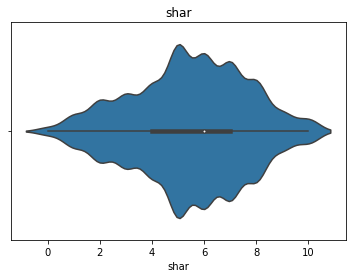

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



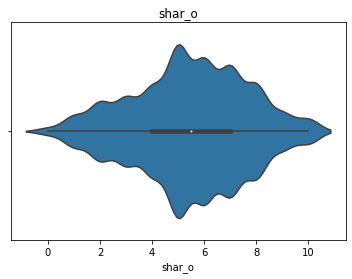

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



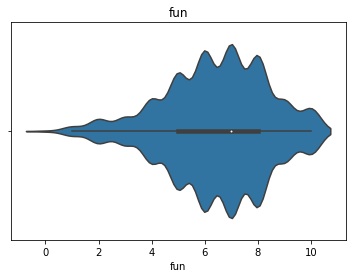

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



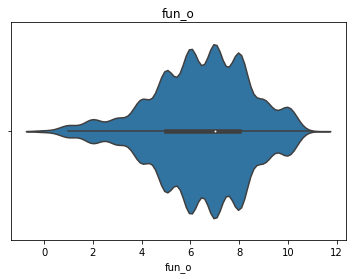

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



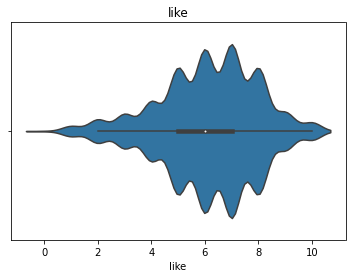

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



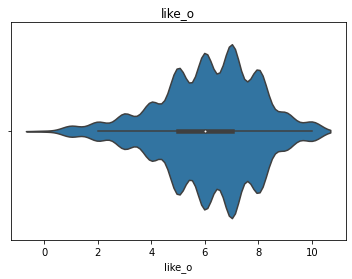

In [35]:
for f in feats:
  sns.violinplot(X_train[f]) 
  plt.title(f"{f}")
  plt.show()

In [36]:
X_train['field'].str.lower().str.split().str[0].str.split('/').str[0].value_counts()

business       447
law            432
social         298
mba            297
electrical     145
              ... 
american         5
japanese         5
fundraising      4
stats            4
soa              2
Name: field, Length: 108, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [38]:
preprocess = make_pipeline(SimpleImputer(), StandardScaler())

In [39]:
lin = make_pipeline(preprocess, LogisticRegression(random_state=SEED, class_weight='balanced'))

lhparams = {
    "logisticregression__class_weight": ['balanced', None ],
    "logisticregression__C": [.1, .5, .8, 1.],
    "logisticregression__penalty": ["l2", None],
    "pipeline__simpleimputer__strategy": ["mean", "median"],
}

In [40]:
lin_search = RandomizedSearchCV(
    lin,
    lhparams,
    scoring='neg_log_loss',
    cv=5,
    n_jobs=-1,
    n_iter=10
)

lin_search.fit(X_train[feats], y_train.values)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('pipeline',
                                              Pipeline(memory=None,
                                                       steps=[('simpleimputer',
                                                               SimpleImputer(add_indicator=False,
                                                                             copy=True,
                                                                             fill_value=None,
                                                                             missing_values=nan,
                                                                             strategy='mean',
                                                                             verbose=0)),
                                                              ('standardscaler',
                                                           

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

In [42]:
numeric=X_train.columns[X_train.dtypes != object]

In [43]:
preprocess = SimpleImputer()
tree = make_pipeline(preprocess, RandomForestClassifier(random_state=SEED, class_weight='balanced'))
tparams = {
    "randomforestclassifier__n_estimators": [400, 500, 600],
    "simpleimputer__strategy": ["mean", "median"]
}

tree_search = RandomizedSearchCV(
    tree,
    tparams,
    scoring='neg_log_loss',
    cv=5,
    n_jobs=-1,
    n_iter=2
)
tree_search.fit(X_train[numeric], y_train.values)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('simpleimputer',
                                              SimpleImputer(add_indicator=False,
                                                            copy=True,
                                                            fill_value=None,
                                                            missing_values=nan,
                                                            strategy='mean',
                                                            verbose=0)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight='balanced',
                                                  

: (((((

In [44]:
tree_search.best_params_

{'randomforestclassifier__n_estimators': 500,
 'simpleimputer__strategy': 'mean'}

In [47]:
tree_search.best_score_


-0.32282269563111166

In [50]:
log_loss(y_test, tree_search.predict(X_test[numeric])) 

4.608282021395686

Linear model is overfitting

In [ ]:
lin_search.best_score_ 

In [ ]:
log_loss(y_test, lin_search.predict(X_test[feats]))

In [ ]:
lin_search.predict(X_test[feats]) 

In [ ]:
lin_comp = pd.DataFrame({'preds':lin_search.predict(X_test[feats]),'real':y_test})

In [51]:
tree_comp = pd.DataFrame({'preds':tree_search.predict(X_test[numeric]),'real':y_test})

In [52]:
tree_comp[tree_comp['preds'] != tree_comp['real']].sum()

# poor job at predicting a real event 
# Tree is my best chance at victory : ) ) ) ) 

preds     16
real     182
dtype: int64

In [53]:
lin_search.best_estimator_

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('simpleimputer',
                                  SimpleImputer(add_indicator=False, copy=True,
                                                fill_value=None,
                                                missing_values=nan,
                                                strategy='mean', verbose=0)),
                                 ('standardscaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True))],
                          verbose=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
      

In [54]:
holdout=holdout.iloc[:,1:]

In [55]:
results = tree_search.predict_log_proba(holdout[numeric])

In [57]:
-results

array([[0.10314076, 2.3227878 ],
       [0.18152188, 1.79576749],
       [0.09871597, 2.3644605 ],
       ...,
       [0.03252319, 3.44201938],
       [0.28236291, 1.40242374],
       [0.19601488, 1.72597173]])

In [ ]:
pd.DataFrame({'log_probas':results[:,0]}).to_csv()

In [ ]:
pd.DataFrame({'predict':results})